In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit

# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
#분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

# 샘플링 : Over-sampling 등
from imblearn.over_sampling import SMOTE

# 나눔 고딕으로 지정 / 사이즈는 20 / 음수 표시
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (14,4)

# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

# Check the Frequency of Variable
from collections import Counter
# 통계 분석 패키지
from scipy import stats
import scipy.stats

# 맑은 고딕 적용
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc('axes', unicode_minus = False)

In [2]:
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [3]:
df= pd.read_csv("Broad_Casting.csv")
df

,방송Code,채널,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,...,상품취소수량,상품취소금액,ARS금액,매입형태,배송방식,상품소요분,상품가중분,상품방송순번,방송시작시간,방송종료시간
0,1.010036e+09,TV,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,...,73,9624136,1000,위탁매입,협력사배송,50.0,52.7,1,2020-01-03T00:10,2020-01-03T01:00
1,1.019126e+09,TV,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,...,16,2547305,1000,위탁매입,직택배,30.0,19.1,1,2020-01-03T01:00,2020-01-03T02:00
2,1.019226e+09,TV,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,...,0,0,0,위탁매입,직택배,30.0,19.1,2,2020-01-03T01:00,2020-01-03T02:00
3,1.040337e+09,TV,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,...,25,1080206,1000,위탁매입,협력사배송,60.0,19.7,1,2020-01-03T02:00,2020-01-03T03:00
4,1.021427e+09,TV,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,...,5,238512,1000,위탁매입,협력사배송,60.0,16.1,1,2020-01-03T03:00,2020-01-03T04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,1.046263e+13,TV,60.0,94.3,생방송,가전,11179512,■연말특가■제우스커브드 UHD TV 65형,과세,92367433,...,20,11783638,1000,위탁매입,협력사배송,19.9,32.6,1,2021-11-13T21:45,2021-11-13T22:45
26279,1.046263e+13,TV,60.0,94.3,생방송,가전,11179514,2019 제우스 UHD TV 75형,과세,33698544,...,4,4683636,1000,위탁매입,협력사배송,26.7,41.9,2,2021-11-13T21:45,2021-11-13T22:45
26280,1.046263e+13,TV,60.0,94.3,생방송,가전,11179504,■연말특가■제우스커브드 UHD TV 55형,과세,17202608,...,9,3667275,1000,위탁매입,협력사배송,13.4,22.7,3,2021-11-13T21:45,2021-11-13T22:45
26281,1.020263e+13,TV,60.0,91.6,재방송,재방_건강식품,11152474,[래오이경제] 흑염소진액 70ml x 120포,과세,154250864,...,27,3879990,1000,위탁매입,협력사배송,60.0,91.6,1,2021-11-13T22:45,2021-11-13T23:45


In [4]:
df = df.drop("채널",axis = 1)

In [5]:
df

,방송Code,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,상품취소수량,상품취소금액,ARS금액,매입형태,배송방식,상품소요분,상품가중분,상품방송순번,방송시작시간,방송종료시간
0,1.010036e+09,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,...,73,9624136,1000,위탁매입,협력사배송,50.0,52.7,1,2020-01-03T00:10,2020-01-03T01:00
1,1.019126e+09,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,...,16,2547305,1000,위탁매입,직택배,30.0,19.1,1,2020-01-03T01:00,2020-01-03T02:00
2,1.019226e+09,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,29178755,...,0,0,0,위탁매입,직택배,30.0,19.1,2,2020-01-03T01:00,2020-01-03T02:00
3,1.040337e+09,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,28904601,...,25,1080206,1000,위탁매입,협력사배송,60.0,19.7,1,2020-01-03T02:00,2020-01-03T03:00
4,1.021427e+09,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,24550467,...,5,238512,1000,위탁매입,협력사배송,60.0,16.1,1,2020-01-03T03:00,2020-01-03T04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,1.046263e+13,60.0,94.3,생방송,가전,11179512,■연말특가■제우스커브드 UHD TV 65형,과세,92367433,151422021,...,20,11783638,1000,위탁매입,협력사배송,19.9,32.6,1,2021-11-13T21:45,2021-11-13T22:45
26279,1.046263e+13,60.0,94.3,생방송,가전,11179514,2019 제우스 UHD TV 75형,과세,33698544,55243515,...,4,4683636,1000,위탁매입,협력사배송,26.7,41.9,2,2021-11-13T21:45,2021-11-13T22:45
26280,1.046263e+13,60.0,94.3,생방송,가전,11179504,■연말특가■제우스커브드 UHD TV 55형,과세,17202608,28200996,...,9,3667275,1000,위탁매입,협력사배송,13.4,22.7,3,2021-11-13T21:45,2021-11-13T22:45
26281,1.020263e+13,60.0,91.6,재방송,재방_건강식품,11152474,[래오이경제] 흑염소진액 70ml x 120포,과세,154250864,202961664,...,27,3879990,1000,위탁매입,협력사배송,60.0,91.6,1,2021-11-13T22:45,2021-11-13T23:45


In [6]:
df_p= pd.read_csv("Product.csv")
df_p

,상품ID,상품명,브랜드ID,브랜드명,매입과세구분,대분류,중분류,소분류,세분류,카테고리,협력사ID,협력사명,매입형태,배송방식,판매단가
0,10010984,완도 생매생이 35팩_3,21572,매생이(청삼대),면세,식품,수산물,건어물,김/미역/다시마,신선수산,100067,주식회사 뮤도파,위탁매입,협력사배송,40900
1,10011287,제조상궁 국내산 메주 담금 세트,21602,제조상궁메주담금세트,면세,식품,농산물,기타,기타,신선농산,100002,산협경제지주㈜,위탁매입,직택배,69900
2,10011746,프리미엄 제주은갈치300gx6미_2,21481,은갈치(제주SF),면세,식품,수산물,일반어류,갈치,신선수산,100004,물산업협동조합중앙회,위탁매입,직택배,68900
3,10012135,가포 멀티5 마사지기 풀세트,21264,가포멀티5,과세,건강,의료기기,의료용픔,공기압마사지기,레포츠기기,101032,(주)규포넷,위탁매입,협력사배송,198000
4,10013259,맷돌로갈아만든검은콩두유(185ml×105팩)_3,20852,맷돌두유,과세,식품,가공식품,유제품,두유,가공농산,100875,(주)마나스코리아,위탁매입,협력사배송,59900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,11179512,■연말특가■제우스커브드 UHD TV 65형,42184,제우스커브드TV2019,과세,가전,영상가전,TV,스마트 TV,가전,100716,(주)라이온그룹코리아,위탁매입,협력사배송,649000
6812,11179513,[데이스포] 밀크패드 1세트100p,44635,데이스포배변패드,과세,생활용품,일용잡화,포장류,기타,생활용품,100003,(주)산업기업유통센터,위탁매입,협력사배송,19000
6813,11179514,2019 제우스 UHD TV 75형,42174,제우스TV2019,과세,가전,영상가전,TV,스마트 TV,가전,100716,(주)라이온그룹코리아,위탁매입,협력사배송,1289000
6814,11179873,(직택배)[단품]100% 한우사골_3,44508,한우사골,면세,식품,축산물,한우,한우사골,신선축산,100067,주식회사 뮤도파,위탁매입,직택배,30900


# 수수료율의 차이를 여러 변수를 통해 알아보자

## <직매입 vs 위탁매입>

In [7]:
df_JikMae = df[df.매입형태 == "직매입"]

In [8]:
df_WetakMae = df[df.매입형태 == "위탁매입"]

In [9]:
a = df_JikMae.수수료율.mean()
a

33.98263002944068

In [10]:
b = df_WetakMae.수수료율.mean()
b

22.465155953134907

### 어째서 위탁 수수료율이 더 작은가? 그저 상품의 문제인것인가?

In [11]:
df_JikMae.sort_values(by = "수수료율").상품명.head(5)

11580    [라미카] 올라이크라 브라팬티 16종 세트
11544        [라미카]인견하이웨스트팬티10종_D
11268        [라미카]인견하이웨스트팬티10종_D
11232    [라미카] 올라이크라 브라팬티 16종 세트
11111    [라미카] 올라이크라 브라팬티 16종 세트
Name: 상품명, dtype: object

In [12]:
df_WetakMae.sort_values(by = "수수료율").상품명.head(5)

16796    [지역희망][大사이즈] 드림어부 손질통오징어 13미
16670                     블랙홀 카매트 풀세트
23895                  굿테크 바른자세 방석 1개
23220         상산재 평창 산양삼 10년근 특등급 6뿌리
23894                굿테크 바른자세 방석(1+1)
Name: 상품명, dtype: object

### 수수료율이 가장 큰 값도 직매입에 있다.

## <협력사배송 vs 당사배송 vs 직택배 비교해보기>

In [13]:
df_Hyup = df[df.배송방식 == "협력사배송"]

In [14]:
df_Dangsa = df[df.배송방식 == "당사배송"]

In [15]:
df_Jik = df[df.배송방식 == "직택배"]

In [16]:
df_Hyup.수수료율.mean()

22.5128066922158

In [17]:
df_Dangsa.수수료율.mean()

33.9689215686275

In [18]:
df_Jik.수수료율.mean()

21.306646586345387

### 당사배송의 수수료율이 제일 높다.

## 두가지 가정으로 볼때 수수료율은 오직 홍보수수료율만 나타내고 배송이나 매입 수수료는 포함되지 않을 확률이 높지않나 생각해봤다~

## <생방송 vs 녹화방송 vs 재방송 >

In [19]:
df_Sang = df[df.방송구분 == "생방송"]

In [20]:
df_Nok = df[df.방송구분 == "녹화방송"]

In [21]:
df_Jae = df[df.방송구분 == "재방송"]

In [22]:
df_Sang.수수료율.mean()

22.340441034962137

In [23]:
df_Nok.수수료율.mean()

22.82051282051282

In [24]:
df_Jae.수수료율.mean()

24.32975723003451

### 방송별 수수료율의 차이는 크지 않은 듯 하다

## <부서 中 상생협력팀 과 같은 특수한 팀은 수수료 등에 차이가 있는가>

In [25]:
df_Sangseng = df_p[df_p.카테고리.str.contains('상생_')]
df_Sangseng.head(2)

,상품ID,상품명,브랜드ID,브랜드명,매입과세구분,대분류,중분류,소분류,세분류,카테고리,협력사ID,협력사명,매입형태,배송방식,판매단가
309,10115794,금원산마을 전통부각 5종세트(총22봉),27587,금원산마을전통부각,과세,식품,가공식품,반찬류,부각/튀각,상생_식품,102805,(주)다리컨설팅,위탁매입,협력사배송,44900
532,10244461,산채움 장아찌 건나물 세트,36275,산채움건나물장아찌세트,과세,식품,가공식품,반찬류,반찬세트,상생_식품,100002,산협경제지주㈜,위탁매입,협력사배송,40900


In [26]:
df2=pd.merge(df, df_p, on=["상품ID","상품명","매입과세구분","매입형태","배송방식","판매단가"], how='inner')
df2.head()

,방송Code,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,방송종료시간,브랜드ID,브랜드명,대분류,중분류,소분류,세분류,카테고리,협력사ID,협력사명
0,1.010036e+09,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,...,2020-01-03T01:00,36178,비지트인뉴욕코트,의류,여성의류,여성복,기타,의류,104532,(주)턱케이앤코
1,1.010796e+11,50.0,15.1,재방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,18764268,33507621,...,2020-01-23T03:35,36178,비지트인뉴욕코트,의류,여성의류,여성복,기타,의류,104532,(주)턱케이앤코
2,1.010182e+12,50.0,11.6,재방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,13965673,24938701,...,2020-02-19T03:50,36178,비지트인뉴욕코트,의류,여성의류,여성복,기타,의류,104532,(주)턱케이앤코
3,1.010242e+12,50.0,41.9,재방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,50335948,89885621,...,2020-03-06T01:35,36178,비지트인뉴욕코트,의류,여성의류,여성복,기타,의류,104532,(주)턱케이앤코
4,1.019126e+09,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,...,2020-01-03T02:00,26356,한삼인순홍삼진,식품,건강식품,전통건강식품,건강즙류,건강식품,100002,산협경제지주㈜


In [27]:
df_Sangseng = df2[df2.카테고리.str.contains('상생_')]
df_Sangseng.수수료율.mean()

7.593088071348941

In [28]:
df2.수수료율.mean()

22.785321675024644

### 상생의 수수료율이 훨씬 저렴함을 알수있다!

In [29]:
df_time = df.가중분 / df.소요분
df_time

0        1.054000
1        0.635000
2        0.635000
3        0.328333
4        0.268333
           ...   
26278    1.571667
26279    1.571667
26280    1.571667
26281    1.526667
26282    0.891711
Length: 26283, dtype: float64

In [30]:
df

,방송Code,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,상품취소수량,상품취소금액,ARS금액,매입형태,배송방식,상품소요분,상품가중분,상품방송순번,방송시작시간,방송종료시간
0,1.010036e+09,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,...,73,9624136,1000,위탁매입,협력사배송,50.0,52.7,1,2020-01-03T00:10,2020-01-03T01:00
1,1.019126e+09,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,...,16,2547305,1000,위탁매입,직택배,30.0,19.1,1,2020-01-03T01:00,2020-01-03T02:00
2,1.019226e+09,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,29178755,...,0,0,0,위탁매입,직택배,30.0,19.1,2,2020-01-03T01:00,2020-01-03T02:00
3,1.040337e+09,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,28904601,...,25,1080206,1000,위탁매입,협력사배송,60.0,19.7,1,2020-01-03T02:00,2020-01-03T03:00
4,1.021427e+09,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,24550467,...,5,238512,1000,위탁매입,협력사배송,60.0,16.1,1,2020-01-03T03:00,2020-01-03T04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,1.046263e+13,60.0,94.3,생방송,가전,11179512,■연말특가■제우스커브드 UHD TV 65형,과세,92367433,151422021,...,20,11783638,1000,위탁매입,협력사배송,19.9,32.6,1,2021-11-13T21:45,2021-11-13T22:45
26279,1.046263e+13,60.0,94.3,생방송,가전,11179514,2019 제우스 UHD TV 75형,과세,33698544,55243515,...,4,4683636,1000,위탁매입,협력사배송,26.7,41.9,2,2021-11-13T21:45,2021-11-13T22:45
26280,1.046263e+13,60.0,94.3,생방송,가전,11179504,■연말특가■제우스커브드 UHD TV 55형,과세,17202608,28200996,...,9,3667275,1000,위탁매입,협력사배송,13.4,22.7,3,2021-11-13T21:45,2021-11-13T22:45
26281,1.020263e+13,60.0,91.6,재방송,재방_건강식품,11152474,[래오이경제] 흑염소진액 70ml x 120포,과세,154250864,202961664,...,27,3879990,1000,위탁매입,협력사배송,60.0,91.6,1,2021-11-13T22:45,2021-11-13T23:45


In [31]:
df = pd.concat([df,df_time],axis=1)

In [32]:
df = df.rename(columns={0:"시간변수"})
df

,방송Code,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,상품취소금액,ARS금액,매입형태,배송방식,상품소요분,상품가중분,상품방송순번,방송시작시간,방송종료시간,시간변수
0,1.010036e+09,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,...,9624136,1000,위탁매입,협력사배송,50.0,52.7,1,2020-01-03T00:10,2020-01-03T01:00,1.054000
1,1.019126e+09,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,...,2547305,1000,위탁매입,직택배,30.0,19.1,1,2020-01-03T01:00,2020-01-03T02:00,0.635000
2,1.019226e+09,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,29178755,...,0,0,위탁매입,직택배,30.0,19.1,2,2020-01-03T01:00,2020-01-03T02:00,0.635000
3,1.040337e+09,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,28904601,...,1080206,1000,위탁매입,협력사배송,60.0,19.7,1,2020-01-03T02:00,2020-01-03T03:00,0.328333
4,1.021427e+09,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,24550467,...,238512,1000,위탁매입,협력사배송,60.0,16.1,1,2020-01-03T03:00,2020-01-03T04:00,0.268333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,1.046263e+13,60.0,94.3,생방송,가전,11179512,■연말특가■제우스커브드 UHD TV 65형,과세,92367433,151422021,...,11783638,1000,위탁매입,협력사배송,19.9,32.6,1,2021-11-13T21:45,2021-11-13T22:45,1.571667
26279,1.046263e+13,60.0,94.3,생방송,가전,11179514,2019 제우스 UHD TV 75형,과세,33698544,55243515,...,4683636,1000,위탁매입,협력사배송,26.7,41.9,2,2021-11-13T21:45,2021-11-13T22:45,1.571667
26280,1.046263e+13,60.0,94.3,생방송,가전,11179504,■연말특가■제우스커브드 UHD TV 55형,과세,17202608,28200996,...,3667275,1000,위탁매입,협력사배송,13.4,22.7,3,2021-11-13T21:45,2021-11-13T22:45,1.571667
26281,1.020263e+13,60.0,91.6,재방송,재방_건강식품,11152474,[래오이경제] 흑염소진액 70ml x 120포,과세,154250864,202961664,...,3879990,1000,위탁매입,협력사배송,60.0,91.6,1,2021-11-13T22:45,2021-11-13T23:45,1.526667


In [33]:
df.corr()

,방송Code,소요분,가중분,상품ID,상품목표취급금액,상품목표주문금액,판매단가,수수료율,상품주문수량,상품주문금액,상품취소수량,상품취소금액,ARS금액,상품소요분,상품가중분,상품방송순번,시간변수
방송Code,1.000000,-0.031297,-0.005914,0.643499,0.047661,0.052491,0.051472,-0.077516,-0.018564,0.016922,-0.003863,0.015589,0.107804,-0.043724,-0.028407,0.005916,-0.002351
소요분,-0.031297,1.000000,0.604551,0.039879,0.314968,0.305629,0.085895,0.066405,0.131292,0.283894,0.138104,0.182026,0.021233,0.194843,0.321552,0.042244,0.363032
가중분,-0.005914,0.604551,1.000000,0.043467,0.497792,0.478843,0.176481,-0.080316,0.268039,0.432856,0.238150,0.313989,-0.003557,0.033226,0.547144,0.066247,0.946285
상품ID,0.643499,0.039879,0.043467,1.000000,0.049417,0.072273,0.130860,-0.022894,-0.014009,0.048432,0.014263,0.051481,0.078125,-0.062936,-0.020725,-0.077119,0.035888
상품목표취급금액,0.047661,0.314968,0.497792,0.049417,1.000000,0.915202,-0.101572,-0.126891,0.603515,0.789134,0.461580,0.360411,0.134195,0.684479,0.891337,-0.128076,0.458766
상품목표주문금액,0.052491,0.305629,0.478843,0.072273,0.915202,1.000000,-0.029586,-0.240715,0.442120,0.884139,0.355571,0.399707,0.075679,0.610529,0.818084,-0.115706,0.436442
판매단가,0.051472,0.085895,0.176481,0.130860,-0.101572,-0.029586,1.000000,-0.126199,-0.241966,0.021143,-0.178850,0.369140,-0.004797,-0.273544,-0.150630,-0.016652,0.172530
수수료율,-0.077516,0.066405,-0.080316,-0.022894,-0.126891,-0.240715,-0.126199,1.000000,0.025157,-0.284511,0.037191,-0.070298,0.135937,-0.021291,-0.094968,-0.191090,-0.119878
상품주문수량,-0.018564,0.131292,0.268039,-0.014009,0.603515,0.442120,-0.241966,0.025157,1.000000,0.428696,0.741544,0.195449,0.056338,0.562252,0.654104,-0.062502,0.282591
상품주문금액,0.016922,0.283894,0.432856,0.048432,0.789134,0.884139,0.021143,-0.284511,0.428696,1.000000,0.347224,0.484561,0.044765,0.508435,0.703921,-0.095732,0.385857


In [34]:
aa = df[df.상품목표주문금액 !=0].상품목표주문금액
bb = df[df.상품주문금액 !=0].상품주문금액

df_goal = (bb / aa) *100
df_goal

0         73.606606
1        110.419704
2               NaN
3         68.711649
4         24.808351
            ...    
26278     94.516108
26279    161.022587
26280    155.987491
26281     96.370437
26282     95.133206
Length: 25656, dtype: float64

In [35]:
df_goal.sort_values(ascending=False)

11534    20502.564103
6838      7260.896547
21161     7060.842535
19335     5871.655697
9005      5786.488877
             ...     
26198             NaN
26200             NaN
26253             NaN
26258             NaN
26270             NaN
Length: 25656, dtype: float64

In [36]:
df_goal.mean()

143.38809601595173

In [37]:
df = pd.concat([df,df_goal],axis=1)
df

,방송Code,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,ARS금액,매입형태,배송방식,상품소요분,상품가중분,상품방송순번,방송시작시간,방송종료시간,시간변수,0
0,1.010036e+09,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,...,1000,위탁매입,협력사배송,50.0,52.7,1,2020-01-03T00:10,2020-01-03T01:00,1.054000,73.606606
1,1.019126e+09,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,...,1000,위탁매입,직택배,30.0,19.1,1,2020-01-03T01:00,2020-01-03T02:00,0.635000,110.419704
2,1.019226e+09,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,29178755,...,0,위탁매입,직택배,30.0,19.1,2,2020-01-03T01:00,2020-01-03T02:00,0.635000,NaN
3,1.040337e+09,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,28904601,...,1000,위탁매입,협력사배송,60.0,19.7,1,2020-01-03T02:00,2020-01-03T03:00,0.328333,68.711649
4,1.021427e+09,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,24550467,...,1000,위탁매입,협력사배송,60.0,16.1,1,2020-01-03T03:00,2020-01-03T04:00,0.268333,24.808351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,1.046263e+13,60.0,94.3,생방송,가전,11179512,■연말특가■제우스커브드 UHD TV 65형,과세,92367433,151422021,...,1000,위탁매입,협력사배송,19.9,32.6,1,2021-11-13T21:45,2021-11-13T22:45,1.571667,94.516108
26279,1.046263e+13,60.0,94.3,생방송,가전,11179514,2019 제우스 UHD TV 75형,과세,33698544,55243515,...,1000,위탁매입,협력사배송,26.7,41.9,2,2021-11-13T21:45,2021-11-13T22:45,1.571667,161.022587
26280,1.046263e+13,60.0,94.3,생방송,가전,11179504,■연말특가■제우스커브드 UHD TV 55형,과세,17202608,28200996,...,1000,위탁매입,협력사배송,13.4,22.7,3,2021-11-13T21:45,2021-11-13T22:45,1.571667,155.987491
26281,1.020263e+13,60.0,91.6,재방송,재방_건강식품,11152474,[래오이경제] 흑염소진액 70ml x 120포,과세,154250864,202961664,...,1000,위탁매입,협력사배송,60.0,91.6,1,2021-11-13T22:45,2021-11-13T23:45,1.526667,96.370437


In [38]:
df = df.rename(columns={0:"목표달성률"})
df

,방송Code,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,ARS금액,매입형태,배송방식,상품소요분,상품가중분,상품방송순번,방송시작시간,방송종료시간,시간변수,목표달성률
0,1.010036e+09,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,...,1000,위탁매입,협력사배송,50.0,52.7,1,2020-01-03T00:10,2020-01-03T01:00,1.054000,73.606606
1,1.019126e+09,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,...,1000,위탁매입,직택배,30.0,19.1,1,2020-01-03T01:00,2020-01-03T02:00,0.635000,110.419704
2,1.019226e+09,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,29178755,...,0,위탁매입,직택배,30.0,19.1,2,2020-01-03T01:00,2020-01-03T02:00,0.635000,NaN
3,1.040337e+09,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,28904601,...,1000,위탁매입,협력사배송,60.0,19.7,1,2020-01-03T02:00,2020-01-03T03:00,0.328333,68.711649
4,1.021427e+09,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,24550467,...,1000,위탁매입,협력사배송,60.0,16.1,1,2020-01-03T03:00,2020-01-03T04:00,0.268333,24.808351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,1.046263e+13,60.0,94.3,생방송,가전,11179512,■연말특가■제우스커브드 UHD TV 65형,과세,92367433,151422021,...,1000,위탁매입,협력사배송,19.9,32.6,1,2021-11-13T21:45,2021-11-13T22:45,1.571667,94.516108
26279,1.046263e+13,60.0,94.3,생방송,가전,11179514,2019 제우스 UHD TV 75형,과세,33698544,55243515,...,1000,위탁매입,협력사배송,26.7,41.9,2,2021-11-13T21:45,2021-11-13T22:45,1.571667,161.022587
26280,1.046263e+13,60.0,94.3,생방송,가전,11179504,■연말특가■제우스커브드 UHD TV 55형,과세,17202608,28200996,...,1000,위탁매입,협력사배송,13.4,22.7,3,2021-11-13T21:45,2021-11-13T22:45,1.571667,155.987491
26281,1.020263e+13,60.0,91.6,재방송,재방_건강식품,11152474,[래오이경제] 흑염소진액 70ml x 120포,과세,154250864,202961664,...,1000,위탁매입,협력사배송,60.0,91.6,1,2021-11-13T22:45,2021-11-13T23:45,1.526667,96.370437


In [39]:
df.corr()

,방송Code,소요분,가중분,상품ID,상품목표취급금액,상품목표주문금액,판매단가,수수료율,상품주문수량,상품주문금액,상품취소수량,상품취소금액,ARS금액,상품소요분,상품가중분,상품방송순번,시간변수,목표달성률
방송Code,1.000000,-0.031297,-0.005914,0.643499,0.047661,0.052491,0.051472,-0.077516,-0.018564,0.016922,-0.003863,0.015589,0.107804,-0.043724,-0.028407,0.005916,-0.002351,-0.004654
소요분,-0.031297,1.000000,0.604551,0.039879,0.314968,0.305629,0.085895,0.066405,0.131292,0.283894,0.138104,0.182026,0.021233,0.194843,0.321552,0.042244,0.363032,0.039072
가중분,-0.005914,0.604551,1.000000,0.043467,0.497792,0.478843,0.176481,-0.080316,0.268039,0.432856,0.238150,0.313989,-0.003557,0.033226,0.547144,0.066247,0.946285,0.045211
상품ID,0.643499,0.039879,0.043467,1.000000,0.049417,0.072273,0.130860,-0.022894,-0.014009,0.048432,0.014263,0.051481,0.078125,-0.062936,-0.020725,-0.077119,0.035888,0.001748
상품목표취급금액,0.047661,0.314968,0.497792,0.049417,1.000000,0.915202,-0.101572,-0.126891,0.603515,0.789134,0.461580,0.360411,0.134195,0.684479,0.891337,-0.128076,0.458766,-0.156864
상품목표주문금액,0.052491,0.305629,0.478843,0.072273,0.915202,1.000000,-0.029586,-0.240715,0.442120,0.884139,0.355571,0.399707,0.075679,0.610529,0.818084,-0.115706,0.436442,-0.134696
판매단가,0.051472,0.085895,0.176481,0.130860,-0.101572,-0.029586,1.000000,-0.126199,-0.241966,0.021143,-0.178850,0.369140,-0.004797,-0.273544,-0.150630,-0.016652,0.172530,-0.001106
수수료율,-0.077516,0.066405,-0.080316,-0.022894,-0.126891,-0.240715,-0.126199,1.000000,0.025157,-0.284511,0.037191,-0.070298,0.135937,-0.021291,-0.094968,-0.191090,-0.119878,-0.010301
상품주문수량,-0.018564,0.131292,0.268039,-0.014009,0.603515,0.442120,-0.241966,0.025157,1.000000,0.428696,0.741544,0.195449,0.056338,0.562252,0.654104,-0.062502,0.282591,-0.012627
상품주문금액,0.016922,0.283894,0.432856,0.048432,0.789134,0.884139,0.021143,-0.284511,0.428696,1.000000,0.347224,0.484561,0.044765,0.508435,0.703921,-0.095732,0.385857,-0.008585


In [40]:
df_plus = df.상품주문금액 * (df.수수료율/100)
df_plus

0        21571121.00
1         8376964.70
2               0.00
3         4766598.72
4         1339924.52
            ...     
26278    21467730.15
26279    13343180.55
26280     6598503.90
26281    58678512.90
26282    31649045.28
Length: 26283, dtype: float64

In [41]:
df = pd.concat([df,df_plus],axis=1)
df = df.rename(columns={0:"추정이윤"})
df

,방송Code,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,매입형태,배송방식,상품소요분,상품가중분,상품방송순번,방송시작시간,방송종료시간,시간변수,목표달성률,추정이윤
0,1.010036e+09,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,...,위탁매입,협력사배송,50.0,52.7,1,2020-01-03T00:10,2020-01-03T01:00,1.054000,73.606606,21571121.00
1,1.019126e+09,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,...,위탁매입,직택배,30.0,19.1,1,2020-01-03T01:00,2020-01-03T02:00,0.635000,110.419704,8376964.70
2,1.019226e+09,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,29178755,...,위탁매입,직택배,30.0,19.1,2,2020-01-03T01:00,2020-01-03T02:00,0.635000,NaN,0.00
3,1.040337e+09,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,28904601,...,위탁매입,협력사배송,60.0,19.7,1,2020-01-03T02:00,2020-01-03T03:00,0.328333,68.711649,4766598.72
4,1.021427e+09,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,24550467,...,위탁매입,협력사배송,60.0,16.1,1,2020-01-03T03:00,2020-01-03T04:00,0.268333,24.808351,1339924.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,1.046263e+13,60.0,94.3,생방송,가전,11179512,■연말특가■제우스커브드 UHD TV 65형,과세,92367433,151422021,...,위탁매입,협력사배송,19.9,32.6,1,2021-11-13T21:45,2021-11-13T22:45,1.571667,94.516108,21467730.15
26279,1.046263e+13,60.0,94.3,생방송,가전,11179514,2019 제우스 UHD TV 75형,과세,33698544,55243515,...,위탁매입,협력사배송,26.7,41.9,2,2021-11-13T21:45,2021-11-13T22:45,1.571667,161.022587,13343180.55
26280,1.046263e+13,60.0,94.3,생방송,가전,11179504,■연말특가■제우스커브드 UHD TV 55형,과세,17202608,28200996,...,위탁매입,협력사배송,13.4,22.7,3,2021-11-13T21:45,2021-11-13T22:45,1.571667,155.987491,6598503.90
26281,1.020263e+13,60.0,91.6,재방송,재방_건강식품,11152474,[래오이경제] 흑염소진액 70ml x 120포,과세,154250864,202961664,...,위탁매입,협력사배송,60.0,91.6,1,2021-11-13T22:45,2021-11-13T23:45,1.526667,96.370437,58678512.90


In [42]:
df.corr()

,방송Code,소요분,가중분,상품ID,상품목표취급금액,상품목표주문금액,판매단가,수수료율,상품주문수량,상품주문금액,상품취소수량,상품취소금액,ARS금액,상품소요분,상품가중분,상품방송순번,시간변수,목표달성률,추정이윤
방송Code,1.000000,-0.031297,-0.005914,0.643499,0.047661,0.052491,0.051472,-0.077516,-0.018564,0.016922,-0.003863,0.015589,0.107804,-0.043724,-0.028407,0.005916,-0.002351,-0.004654,-0.027108
소요분,-0.031297,1.000000,0.604551,0.039879,0.314968,0.305629,0.085895,0.066405,0.131292,0.283894,0.138104,0.182026,0.021233,0.194843,0.321552,0.042244,0.363032,0.039072,0.262148
가중분,-0.005914,0.604551,1.000000,0.043467,0.497792,0.478843,0.176481,-0.080316,0.268039,0.432856,0.238150,0.313989,-0.003557,0.033226,0.547144,0.066247,0.946285,0.045211,0.430371
상품ID,0.643499,0.039879,0.043467,1.000000,0.049417,0.072273,0.130860,-0.022894,-0.014009,0.048432,0.014263,0.051481,0.078125,-0.062936,-0.020725,-0.077119,0.035888,0.001748,0.008835
상품목표취급금액,0.047661,0.314968,0.497792,0.049417,1.000000,0.915202,-0.101572,-0.126891,0.603515,0.789134,0.461580,0.360411,0.134195,0.684479,0.891337,-0.128076,0.458766,-0.156864,0.727086
상품목표주문금액,0.052491,0.305629,0.478843,0.072273,0.915202,1.000000,-0.029586,-0.240715,0.442120,0.884139,0.355571,0.399707,0.075679,0.610529,0.818084,-0.115706,0.436442,-0.134696,0.664494
판매단가,0.051472,0.085895,0.176481,0.130860,-0.101572,-0.029586,1.000000,-0.126199,-0.241966,0.021143,-0.178850,0.369140,-0.004797,-0.273544,-0.150630,-0.016652,0.172530,-0.001106,0.023536
수수료율,-0.077516,0.066405,-0.080316,-0.022894,-0.126891,-0.240715,-0.126199,1.000000,0.025157,-0.284511,0.037191,-0.070298,0.135937,-0.021291,-0.094968,-0.191090,-0.119878,-0.010301,0.151959
상품주문수량,-0.018564,0.131292,0.268039,-0.014009,0.603515,0.442120,-0.241966,0.025157,1.000000,0.428696,0.741544,0.195449,0.056338,0.562252,0.654104,-0.062502,0.282591,-0.012627,0.705352
상품주문금액,0.016922,0.283894,0.432856,0.048432,0.789134,0.884139,0.021143,-0.284511,0.428696,1.000000,0.347224,0.484561,0.044765,0.508435,0.703921,-0.095732,0.385857,-0.008585,0.673734


<AxesSubplot:>

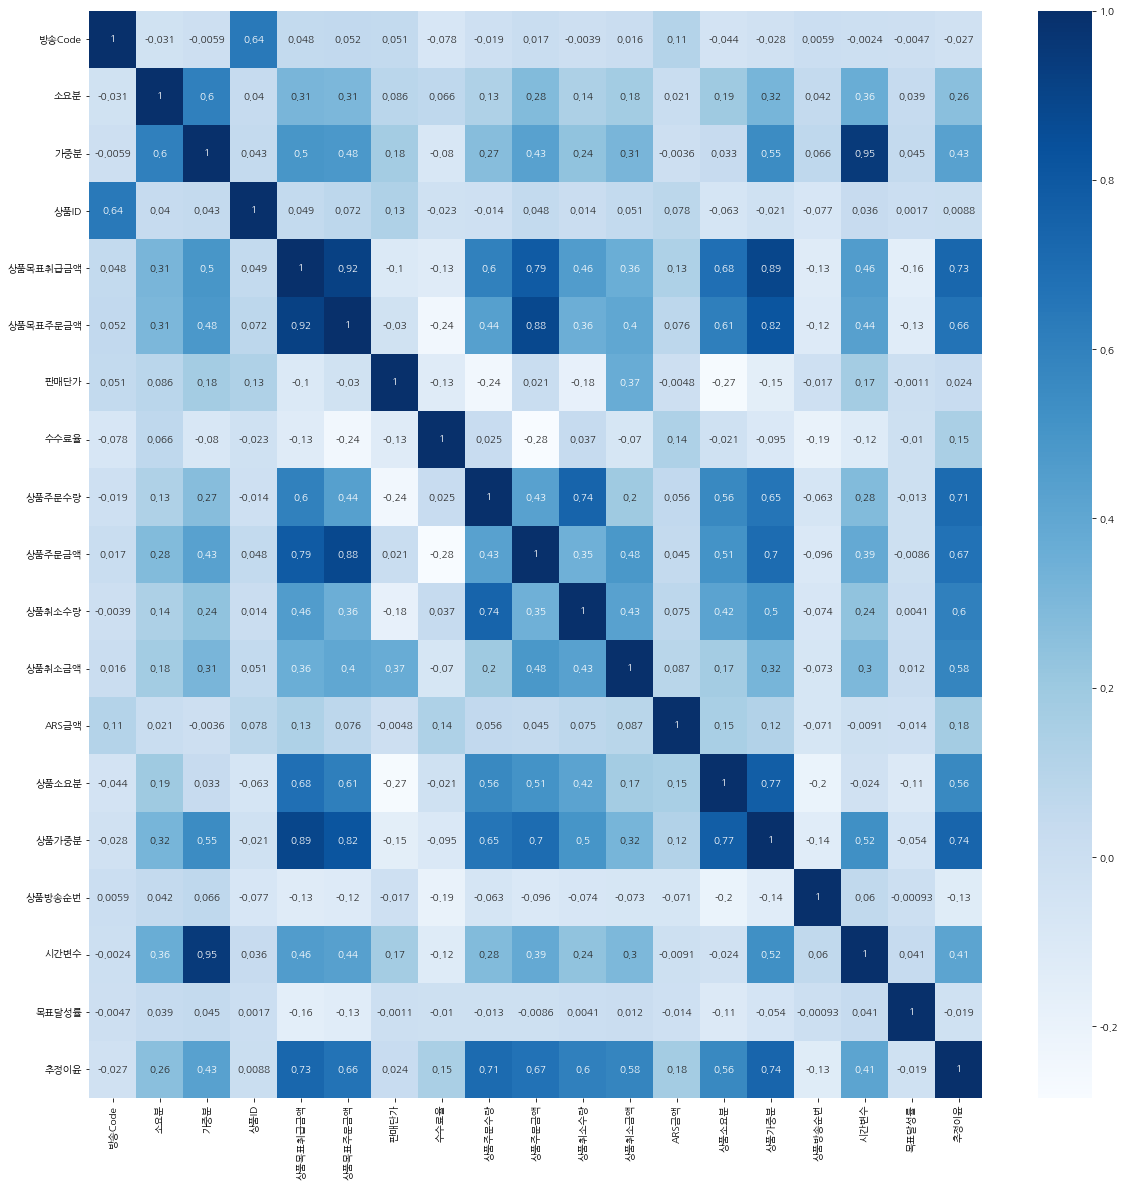

In [43]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

#######################################################################################################################################
##############################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################

In [44]:
df = pd.read_csv("Merge.csv",encoding = "euc-kr")
df

,채널,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,부서명,협력사ID,협력사명,브랜드ID,브랜드명,대분류,중분류,소분류,세분류,카테고리
0,TV,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,...,생활2팀,104532,(주)턱케이앤코,36178,비지트인뉴욕코트,의류,여성의류,여성복,기타,의류
1,TV,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,...,식품4팀,100002,산협경제지주㈜,26356,한삼인순홍삼진,식품,건강식품,전통건강식품,건강즙류,건강식품
2,TV,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,29178755,...,식품4팀,100002,산협경제지주㈜,26356,한삼인순홍삼진,식품,건강식품,전통건강식품,건강즙류,건강식품
3,TV,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,28904601,...,식품1팀,104640,(주)하일에프앤씨,36520,이상용크레마롤,식품,가공식품,빵/떡/과자류,빵/쨈,가공농산
4,TV,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,24550467,...,식품3팀,100004,물산업협동조합중앙회,27468,자숙문어슬라이스,식품,수산물,일반어류,문어,신선수산
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,TV,60.0,94.3,생방송,가전,11179504,■연말특가■제우스커브드 UHD TV 55형,과세,17202608,28200996,...,생활1팀,100716,(주)라이온그룹코리아,42184,제우스커브드TV2019,가전,영상가전,TV,스마트 TV,가전
26279,TV,60.0,94.3,생방송,가전,11179512,■연말특가■제우스커브드 UHD TV 65형,과세,92367433,151422021,...,생활1팀,100716,(주)라이온그룹코리아,42184,제우스커브드TV2019,가전,영상가전,TV,스마트 TV,가전
26280,TV,60.0,94.3,생방송,가전,11179514,2019 제우스 UHD TV 75형,과세,33698544,55243515,...,생활1팀,100716,(주)라이온그룹코리아,42174,제우스TV2019,가전,영상가전,TV,스마트 TV,가전
26281,TV,60.0,91.6,재방송,재방_건강식품,11152474,[래오이경제] 흑염소진액 70ml x 120포,과세,154250864,202961664,...,식품1팀,100955,주식회사행복을파는사람들,44834,이경제흑염소진액,식품,건강식품,전통건강식품,건강즙류,건강식품


In [45]:
from datetime import datetime

df["start hour"] = 0
df["end hour"] = 0
df["날짜"] = 0

for i in range(len(df)):
  df.loc[i, 'start hour'] = str(df.loc[i, '방송시작시간']).split('T')[1].split(":")[0]
  df.loc[i, 'end hour'] = str(df.loc[i, '방송종료시간']).split('T')[1].split(":")[0]
  date = str(df.loc[i, '방송시작시간']).split("T")[0]
  df.loc[i, '날짜'] = date

df.fillna('undefined',inplace=True)

df.head()

,채널,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,브랜드ID,브랜드명,대분류,중분류,소분류,세분류,카테고리,start hour,end hour,날짜
0,TV,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,...,36178,비지트인뉴욕코트,의류,여성의류,여성복,기타,의류,00,01,2020-01-03
1,TV,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,...,26356,한삼인순홍삼진,식품,건강식품,전통건강식품,건강즙류,건강식품,01,02,2020-01-03
2,TV,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,29178755,...,26356,한삼인순홍삼진,식품,건강식품,전통건강식품,건강즙류,건강식품,01,02,2020-01-03
3,TV,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,28904601,...,36520,이상용크레마롤,식품,가공식품,빵/떡/과자류,빵/쨈,가공농산,02,03,2020-01-03
4,TV,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,24550467,...,27468,자숙문어슬라이스,식품,수산물,일반어류,문어,신선수산,03,04,2020-01-03


In [46]:
df_plus = df.상품주문금액 * (df.수수료율/100)
df_plus

0        21571121.00
1         8376964.70
2               0.00
3         4766598.72
4         1339924.52
            ...     
26278     6598503.90
26279    21467730.15
26280    13343180.55
26281    58678512.90
26282    31649045.28
Length: 26283, dtype: float64

In [47]:
df_1 = pd.concat([df,df_plus],axis=1)
df_1 = df_1.rename(columns={0:"추정이윤"})
df_1

,채널,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,브랜드명,대분류,중분류,소분류,세분류,카테고리,start hour,end hour,날짜,추정이윤
0,TV,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,...,비지트인뉴욕코트,의류,여성의류,여성복,기타,의류,00,01,2020-01-03,21571121.00
1,TV,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,...,한삼인순홍삼진,식품,건강식품,전통건강식품,건강즙류,건강식품,01,02,2020-01-03,8376964.70
2,TV,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,29178755,...,한삼인순홍삼진,식품,건강식품,전통건강식품,건강즙류,건강식품,01,02,2020-01-03,0.00
3,TV,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,28904601,...,이상용크레마롤,식품,가공식품,빵/떡/과자류,빵/쨈,가공농산,02,03,2020-01-03,4766598.72
4,TV,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,24550467,...,자숙문어슬라이스,식품,수산물,일반어류,문어,신선수산,03,04,2020-01-03,1339924.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,TV,60.0,94.3,생방송,가전,11179504,■연말특가■제우스커브드 UHD TV 55형,과세,17202608,28200996,...,제우스커브드TV2019,가전,영상가전,TV,스마트 TV,가전,21,22,2021-11-13,6598503.90
26279,TV,60.0,94.3,생방송,가전,11179512,■연말특가■제우스커브드 UHD TV 65형,과세,92367433,151422021,...,제우스커브드TV2019,가전,영상가전,TV,스마트 TV,가전,21,22,2021-11-13,21467730.15
26280,TV,60.0,94.3,생방송,가전,11179514,2019 제우스 UHD TV 75형,과세,33698544,55243515,...,제우스TV2019,가전,영상가전,TV,스마트 TV,가전,21,22,2021-11-13,13343180.55
26281,TV,60.0,91.6,재방송,재방_건강식품,11152474,[래오이경제] 흑염소진액 70ml x 120포,과세,154250864,202961664,...,이경제흑염소진액,식품,건강식품,전통건강식품,건강즙류,건강식품,22,23,2021-11-13,58678512.90


In [48]:
df_1["month"] = 0
df_1['Season'] = 0
df_1.head()

,채널,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,중분류,소분류,세분류,카테고리,start hour,end hour,날짜,추정이윤,month,Season
0,TV,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,...,여성의류,여성복,기타,의류,00,01,2020-01-03,21571121.00,0,0
1,TV,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,...,건강식품,전통건강식품,건강즙류,건강식품,01,02,2020-01-03,8376964.70,0,0
2,TV,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,29178755,...,건강식품,전통건강식품,건강즙류,건강식품,01,02,2020-01-03,0.00,0,0
3,TV,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,28904601,...,가공식품,빵/떡/과자류,빵/쨈,가공농산,02,03,2020-01-03,4766598.72,0,0
4,TV,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,24550467,...,수산물,일반어류,문어,신선수산,03,04,2020-01-03,1339924.52,0,0


In [63]:
for i in range(len(df_1)):
    df_1.loc[i, 'month'] = str(df_1.loc[i, '방송시작시간']).split('T')[0].split('-')[1]


df_1["month"] = df_1["month"].astype(int)


for (idx, row) in df_1.iterrows():
    month = row[44]
    _class = -1
    if month >= 3 and month <= 5: 
        _class = 0   # 0 spring
    elif month >= 6 and month <= 8:
        _class = 1   # 1 summer
    elif month >= 9 and month <= 11: 
        _class = 2   # 2 fall
    else:            
        _class = 3   # 3 winter
    df_1.loc[idx, 'Season'] = _class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26283 entries, 0 to 26282
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   추정이윤      26283 non-null  float64
 1   상품가중분     26283 non-null  float64
 2   상품주문금액    26283 non-null  int64  
 3   Season_0  26283 non-null  uint8  
 4   Season_1  26283 non-null  uint8  
 5   Season_2  26283 non-null  uint8  
 6   Season_3  26283 non-null  uint8  
dtypes: float64(2), int64(1), uint8(4)
memory usage: 718.8 KB


/tmp/ipykernel_30066/3890000706.py:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


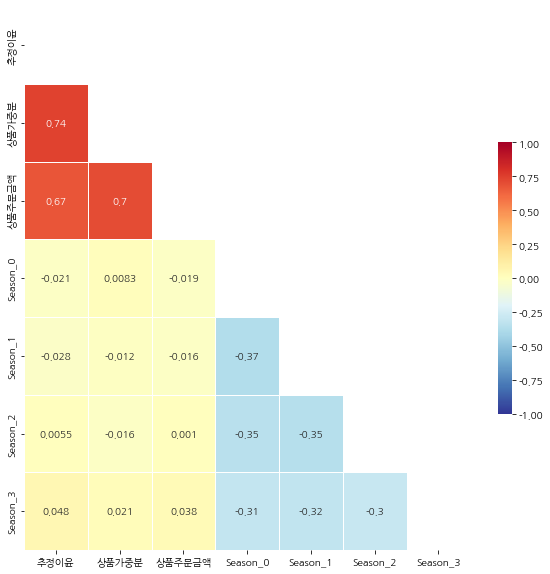

In [65]:
# # weekday, start, end hour
df_SEA = df_1.loc[:,["Season","추정이윤","상품가중분","상품주문금액"]]
df_SEA['Season']=df_SEA['Season'].astype(object)
df_char = df_SEA.select_dtypes(include = 'object')
df_char
df_num = df_SEA.select_dtypes(exclude = 'object')
df_num

df_char = pd.get_dummies(df_char)
df_char.reset_index(inplace=True,drop=False)

# 문자 데이터 + 숫자 데이터
dff = pd.concat([df_num, df_char],axis = 1)
del dff['index']
dff.info()

corr = dff.corr()
corr

fig, ax = plt.subplots(figsize=(10,10))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,cmap = 'RdYlBu_r',annot = True,mask=mask,linewidths=.5,cbar_kws={"shrink": .5},vmin = -1,vmax = 1)  
plt.show()

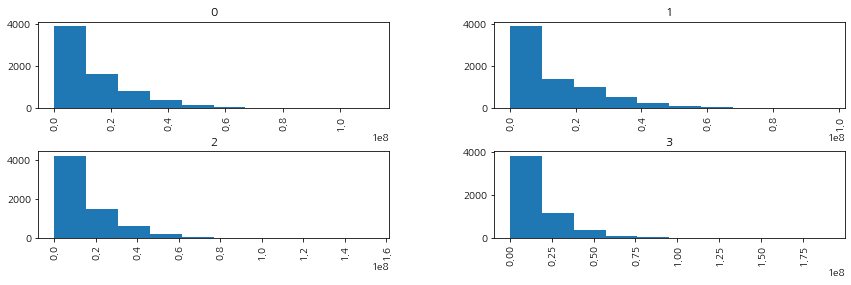

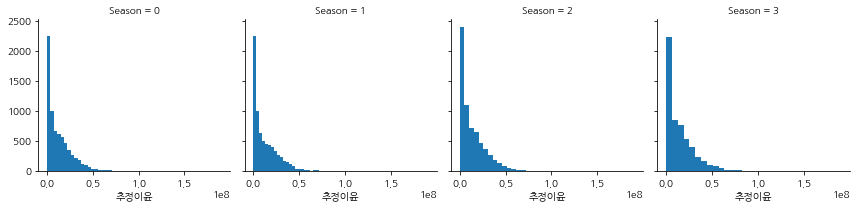

In [66]:
df_SEA.hist(column = "추정이윤",by = "Season")
grid = sns.FacetGrid(df_SEA , col = "Season")
grid.map(plt.hist,"추정이윤",bins = 30)

In [67]:
df_plus = df_1.상품주문금액 * (df_1.수수료율/100)
df_plus

0        21571121.00
1         8376964.70
2               0.00
3         4766598.72
4         1339924.52
            ...     
26278     6598503.90
26279    21467730.15
26280    13343180.55
26281    58678512.90
26282    31649045.28
Length: 26283, dtype: float64

In [68]:
df_1 = pd.concat([df_1,df_plus],axis=1)
df_1 = df_1.rename(columns={0:"총판매매출"})
df_1

,채널,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,소분류,세분류,카테고리,start hour,end hour,날짜,추정이윤,month,Season,총판매매출
0,TV,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,...,여성복,기타,의류,00,01,2020-01-03,21571121.00,1,3,21571121.00
1,TV,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,...,전통건강식품,건강즙류,건강식품,01,02,2020-01-03,8376964.70,1,3,8376964.70
2,TV,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,29178755,...,전통건강식품,건강즙류,건강식품,01,02,2020-01-03,0.00,1,3,0.00
3,TV,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,28904601,...,빵/떡/과자류,빵/쨈,가공농산,02,03,2020-01-03,4766598.72,1,3,4766598.72
4,TV,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,24550467,...,일반어류,문어,신선수산,03,04,2020-01-03,1339924.52,1,3,1339924.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,TV,60.0,94.3,생방송,가전,11179504,■연말특가■제우스커브드 UHD TV 55형,과세,17202608,28200996,...,TV,스마트 TV,가전,21,22,2021-11-13,6598503.90,11,2,6598503.90
26279,TV,60.0,94.3,생방송,가전,11179512,■연말특가■제우스커브드 UHD TV 65형,과세,92367433,151422021,...,TV,스마트 TV,가전,21,22,2021-11-13,21467730.15,11,2,21467730.15
26280,TV,60.0,94.3,생방송,가전,11179514,2019 제우스 UHD TV 75형,과세,33698544,55243515,...,TV,스마트 TV,가전,21,22,2021-11-13,13343180.55,11,2,13343180.55
26281,TV,60.0,91.6,재방송,재방_건강식품,11152474,[래오이경제] 흑염소진액 70ml x 120포,과세,154250864,202961664,...,전통건강식품,건강즙류,건강식품,22,23,2021-11-13,58678512.90,11,2,58678512.90


In [69]:
df_sellco = df_1.loc[:,["총판매매출","상품목표취급금액","상품목표주문금액","상품주문금액","상품가중분"]]
df_sellco.round(2)

,총판매매출,상품목표취급금액,상품목표주문금액,상품주문금액,상품가중분
0,21571121.00,65645345,117223831,86284484,52.7
1,8376964.70,23774849,29178755,32219095,19.1
2,0.00,23774849,29178755,0,19.1
3,4766598.72,24568911,28904601,19860828,19.7
4,1339924.52,20131383,24550467,6090566,16.1
...,...,...,...,...,...
26278,6598503.90,17202608,28200996,43990026,22.7
26279,21467730.15,92367433,151422021,143118201,32.6
26280,13343180.55,33698544,55243515,88954537,41.9
26281,58678512.90,154250864,202961664,195595043,91.6


/tmp/ipykernel_30066/2273951464.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


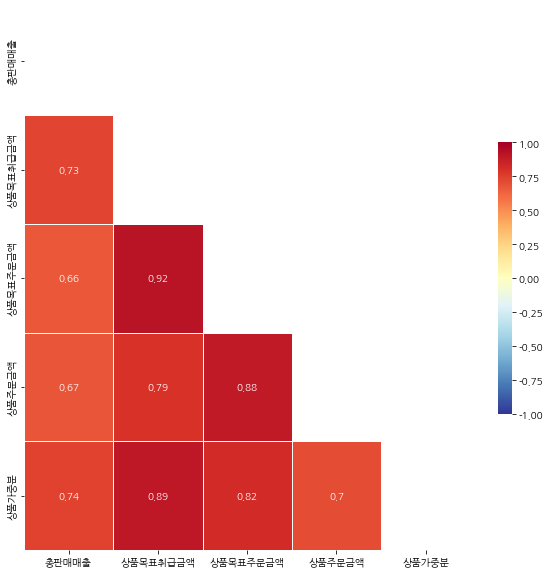

In [70]:
corr = df_sellco.corr()

fig, ax = plt.subplots(figsize=(10,10))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,cmap = 'RdYlBu_r',annot = True,mask=mask,linewidths=.5,cbar_kws={"shrink": .5},vmin = -1,vmax = 1)  
plt.show()

# KRUSKAL

In [71]:
spring1 = df_1[df_1["Season"] == 0].loc[:,["상품주문금액"]]
summer1 = df_1[df_1["Season"] == 1].loc[:,["상품주문금액"]]
fall1 = df_1[df_1["Season"] == 2].loc[:,["상품주문금액"]]
winter1 = df_1[df_1["Season"] == 3].loc[:,["상품주문금액"]]
                                       
spring2 = df_1[df_1["Season"] == 0].loc[:,["총판매매출"]]
summer2 = df_1[df_1["Season"] == 1].loc[:,["총판매매출"]]
fall2 = df_1[df_1["Season"] == 2].loc[:,["총판매매출"]]
winter2 = df_1[df_1["Season"] == 3].loc[:,["총판매매출"]]


In [72]:
spring1.reset_index(drop=True,inplace=True)
summer1.reset_index(drop=True,inplace=True)
fall1.reset_index(drop=True,inplace=True)
winter1.reset_index(drop=True,inplace=True)

spring2.reset_index(drop=True,inplace=True)
summer2.reset_index(drop=True,inplace=True)
fall2.reset_index(drop=True,inplace=True)
winter2.reset_index(drop=True,inplace=True)

In [73]:
spring1 = spring1.loc[1:5496,:]
summer1 = summer1.loc[1:5496,:]
fall1 = fall1.loc[1:5496,:]
winter1 = winter1.loc[1:5496,:]
                                       
spring2 = spring2.loc[1:5496,:]
summer2 = summer2.loc[1:5496,:]
fall2 = fall2.loc[1:5496,:]
winter2 = winter2.loc[1:5496,:]

spring1

,상품주문금액
1,36494855
2,7090861
3,10273744
4,26048569
5,9354744
...,...
5492,11644955
5493,61002402
5494,216000
5495,925091


In [74]:
springsummer1 = pd.concat([spring1,summer1],axis=1)
springsummer1

,상품주문금액,상품주문금액
1,36494855,0
2,7090861,13358050
3,10273744,37501
4,26048569,1230936
5,9354744,0
...,...,...
5492,11644955,1464065
5493,61002402,35970912
5494,216000,16189092
5495,925091,41267269


In [75]:
springsummer2 = pd.concat([spring2,summer2],axis=1)
springsummer2

,총판매매출,총판매매출
1,8.758765e+06,0.000
2,1.666352e+06,4541737.000
3,2.414330e+06,9562.755
4,6.251657e+06,313888.680
5,2.385460e+06,0.000
...,...,...
5492,2.911239e+06,468500.800
5493,1.433556e+07,5395636.800
5494,5.508000e+04,2428363.800
5495,2.358982e+05,6190090.350


In [76]:
fallwinter1 = pd.concat([fall1,winter1],axis=1)
fallwinter1

,상품주문금액,상품주문금액
1,4561233,32219095
2,8890840,0
3,12363655,19860828
4,10117979,6090566
5,9586260,19700190
...,...,...
5492,14137746,22911207
5493,58008256,52596300
5494,59750266,84595507
5495,36561674,698600056


In [77]:
fallwinter2 = pd.concat([fall2,winter2],axis=1)
fallwinter2

,총판매매출,총판매매출
1,1094695.92,8.376965e+06
2,2133801.60,0.000000e+00
3,3090913.75,4.766599e+06
4,2529494.75,1.339925e+06
5,2396565.00,5.023548e+06
...,...,...
5492,3675813.96,5.727802e+06
5493,15082146.56,1.314908e+07
5494,15535069.16,1.987994e+07
5495,9506035.24,1.536920e+07


In [78]:
from scipy.stats import ranksums

statistic,p = stats.ranksums(springsummer1,fallwinter1)
print(statistic)
print(p)

181.54673486873014
0.0


In [79]:
statistic,p = stats.ranksums(springsummer2,fallwinter2)
print("statistic = {}, p-value= {}".format(statistic,p))

statistic = 184.7428996801498, p-value= 0.0


In [80]:
f_result = stats.kruskal(spring1.상품주문금액,summer1.상품주문금액,fall1.상품주문금액,winter1.상품주문금액)


f,p = f_result.statistic.round(3),f_result.pvalue

print("kruskal")
print("F통계량 : {}".format(f))
print("p-value :",p)

kruskal
F통계량 : 22.991
p-value : 4.0555540681655854e-05


In [81]:
f_result = stats.kruskal(spring2.총판매매출,summer2.총판매매출,fall2.총판매매출,winter2.총판매매출)


f,p = f_result.statistic.round(3),f_result.pvalue

print("kruskal")
print("F통계량 : {}".format(f))
print("p-value : {}".format(p))

kruskal
F통계량 : 17.802
p-value : 0.0004833161854339092


## p-value가 0.05이하 이므로 계절별 평균 상품주문금액, 총판매매출은 차이가 있다고 할 수 있다.